### Simple Watershed 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from skimage.segmentation import clear_border
from PIL import Image

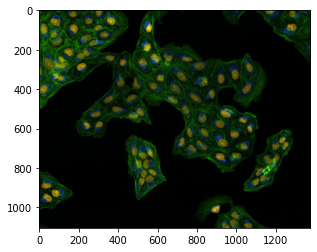

In [2]:
img = cv2.imread('../raw_data/watershed/SimpleExample/Osteosarcoma_01.tif')
plt.imshow(img);

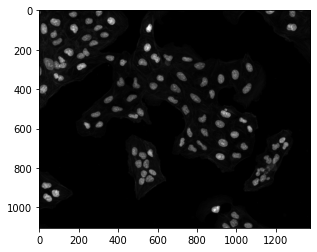

In [3]:
#blue channel, image equivalent to grey image
cell = img[:,:,0]
plt.imshow(cell, cmap='gray');

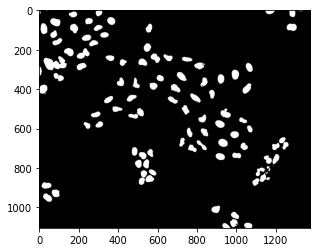

In [4]:
ret1, thresh = cv2.threshold(cell, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

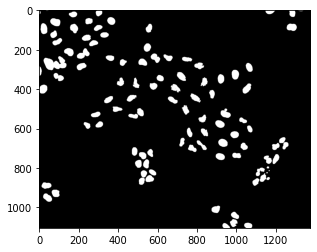

In [5]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

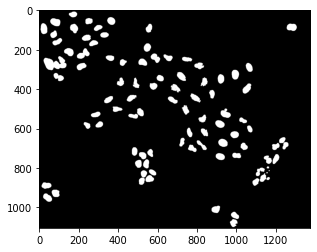

In [6]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

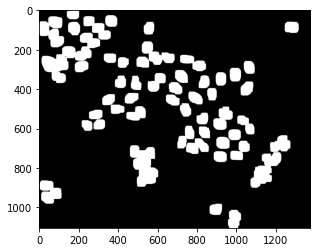

In [7]:
sure_backg = cv2.dilate(opening, kernel, iterations=10)
plt.imshow(sure_backg, cmap='gray');

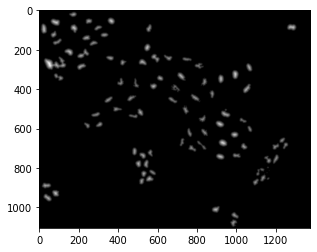

In [8]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.imshow(dist_transform, cmap='gray');

In [9]:
dtf_max = dist_transform.max()
print(dtf_max)

21.968996


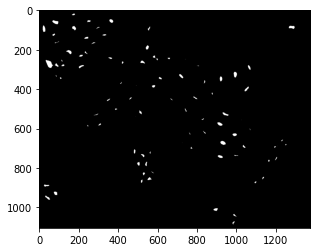

In [10]:
ret2, sure_foreg = cv2.threshold(dist_transform, 0.5*dtf_max, 255, 0)
plt.imshow(sure_foreg, cmap='gray');

In [11]:
sure_foreg = np.uint8(sure_foreg)

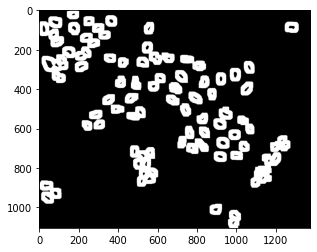

In [12]:
unknown = cv2.subtract(sure_backg,sure_foreg)
plt.imshow(unknown, cmap='gray');

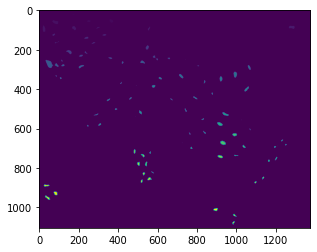

In [13]:
ret3, markers = cv2.connectedComponents(sure_foreg)
plt.imshow(markers);

In [14]:
#background pixel value 0 --> problem
#watershed would consider this as unknown 
#add 10 to all labels so that background is not 0 
markers = markers+10

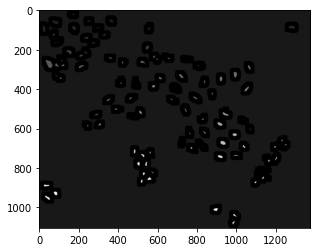

In [15]:
#mark the region of unknown with 0
markers[unknown == 255] = 0
plt.imshow(markers, cmap='gray');

In [16]:
markers = cv2.watershed(img,markers)

In [17]:
img[markers == -1] = [0,255,255]

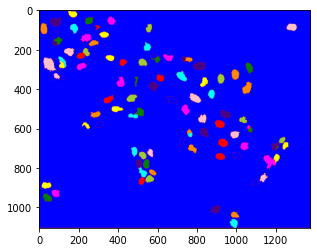

In [18]:
img2 = color.label2rgb(markers, bg_label=0)
plt.imshow(img2);

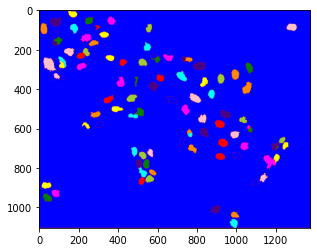

In [19]:
plt.imshow(img2);

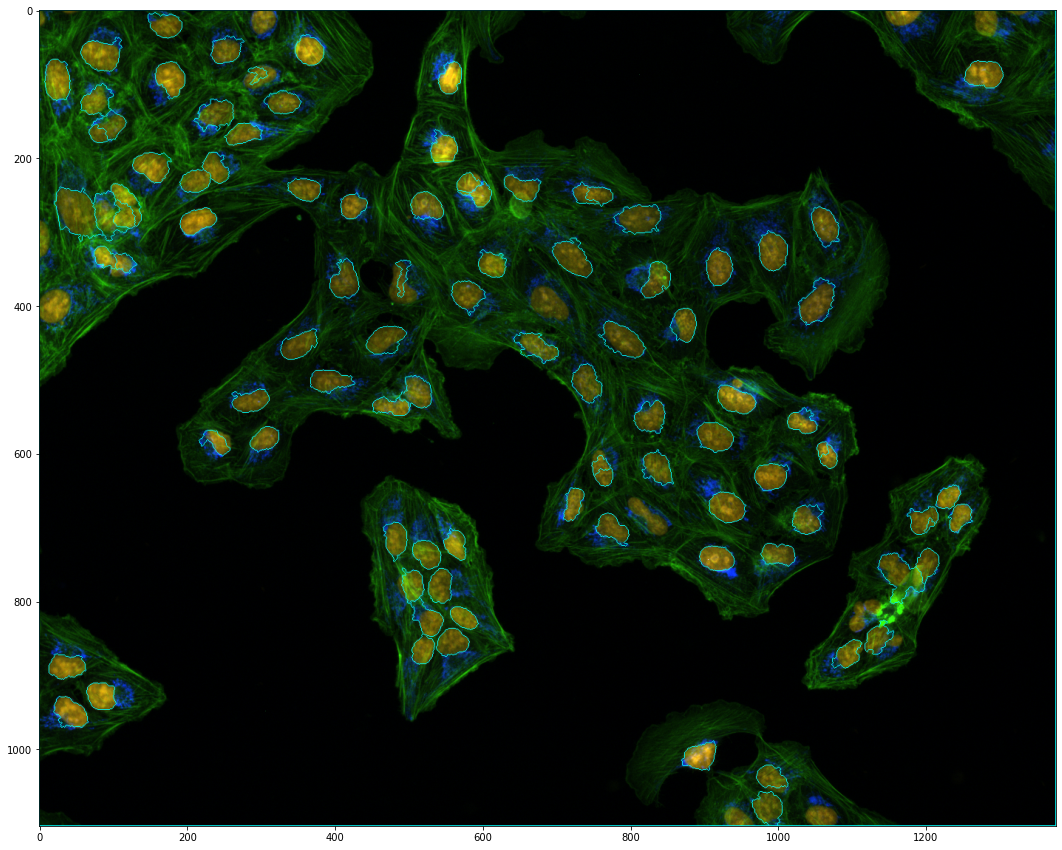

In [20]:
plt.figure(figsize=(20,15))
plt.imshow(img);

### Blood smear 

# Preprocessing

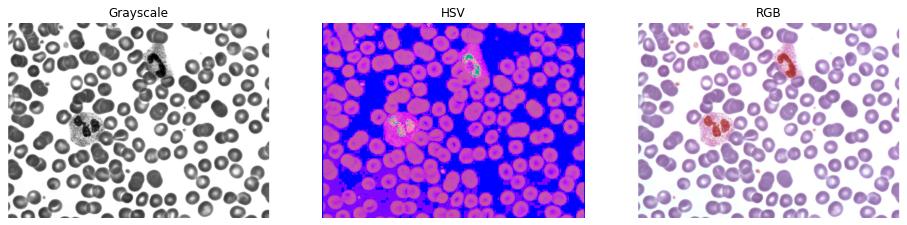

In [21]:
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

rc = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')

rc_gray = rgb2gray(rc)
rc_hsv = rgb2hsv(rc)

plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(rc_gray, cmap="gray")
plt.axis("off")
plt.title("Grayscale")
plt.subplot(1,3,2)
plt.imshow(rc_hsv)
plt.axis("off")
plt.title("HSV")
plt.subplot(1,3,3)
plt.imshow(rc)
plt.axis("off")
plt.title("RGB");

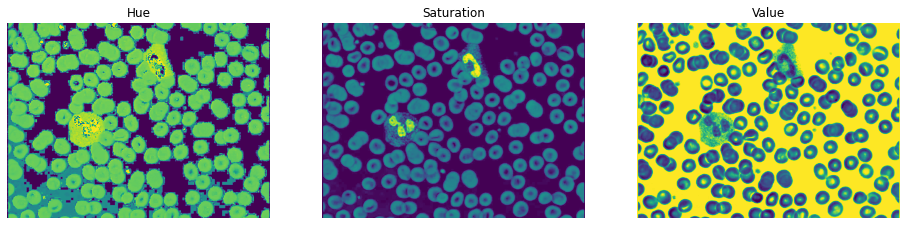

In [22]:
rc_hue = rc_hsv[:,:,0]
rc_sat = rc_hsv[:,:,1]
rc_value = rc_hsv[:,:,2]


plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(rc_hue)
plt.axis("off")
plt.title("Hue")
plt.subplot(1,3,2)
plt.imshow(rc_sat)
plt.axis("off")
plt.title("Saturation")
plt.subplot(1,3,3)
plt.imshow(rc_value)
plt.axis("off")
plt.title("Value");

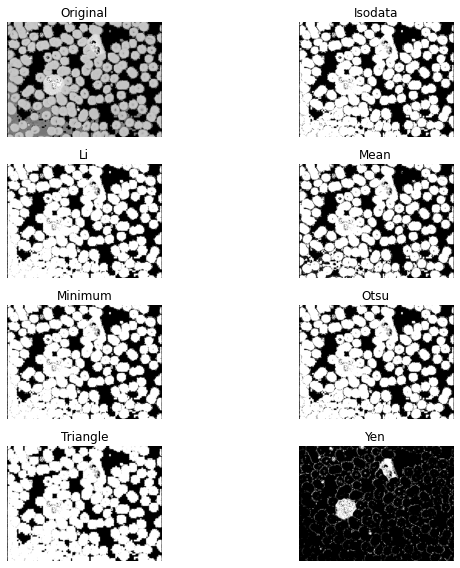

In [23]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(rc_hue, figsize=(10, 8), verbose=False)
plt.show()

In [24]:
from skimage.filters import threshold_yen

rc_yen = threshold_yen(rc_hue)
rc_yen

0.8326605902777777

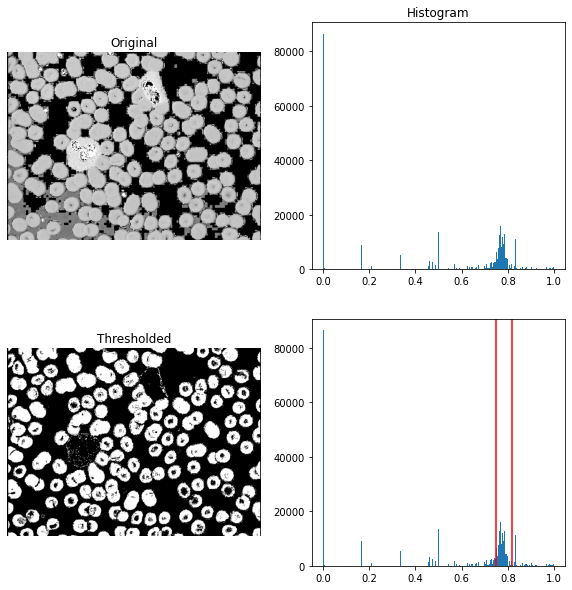

In [25]:
from skimage.filters import threshold_minimum, threshold_otsu, threshold_mean, threshold_isodata, threshold_li, threshold_local
from cv2 import inRange

image = rc_hue


thresh_min = 0.75     #threshold_mean(image)
thresh_max = 0.82

binary = inRange(image, thresh_min, thresh_max) #thresh_max > image > thresh

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap="gray")

ax[0, 0].set_title('Original')

ax[0, 1].hist(image.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

ax[1, 0].imshow(binary, cmap="gray")
ax[1, 0].set_title('Thresholded')

ax[1, 1].hist(image.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')
ax[1, 1].axvline(thresh_max, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

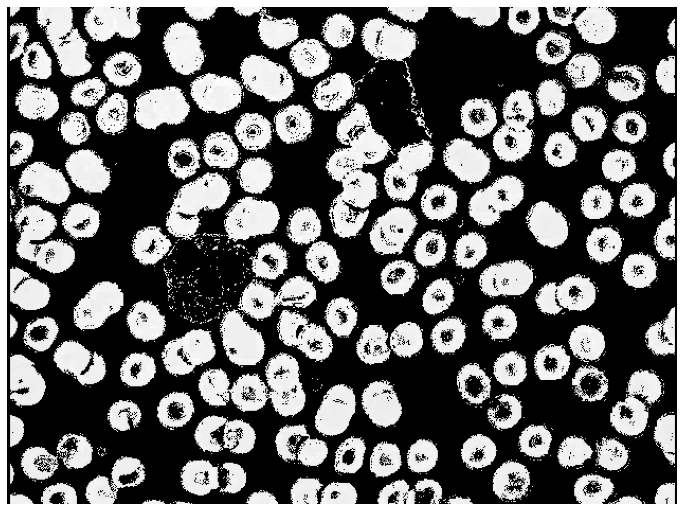

In [26]:
im_pre = binary * rc_hue

plt.figure(figsize=(12,12))
plt.axis("off")
plt.imshow(im_pre, cmap="gray");

In [27]:
type(im_pre)

numpy.ndarray

In [28]:
im_pre.shape

(470, 633)

In [29]:
im_pre

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 194.72727273,
          0.        ,   0.        ]])

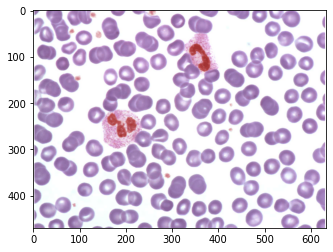

In [30]:
bs = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')
plt.imshow(bs);

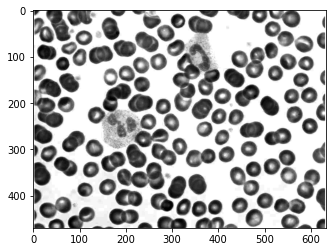

In [31]:
bc = bs[:,:,0]
plt.imshow(bc, cmap='gray');

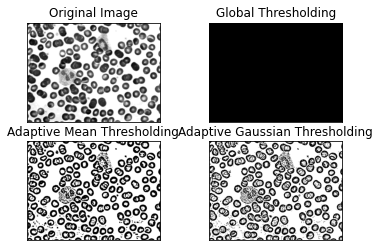

In [32]:
ret,th1 = cv2.threshold(bc,0,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(bc,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(bc,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [bc, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

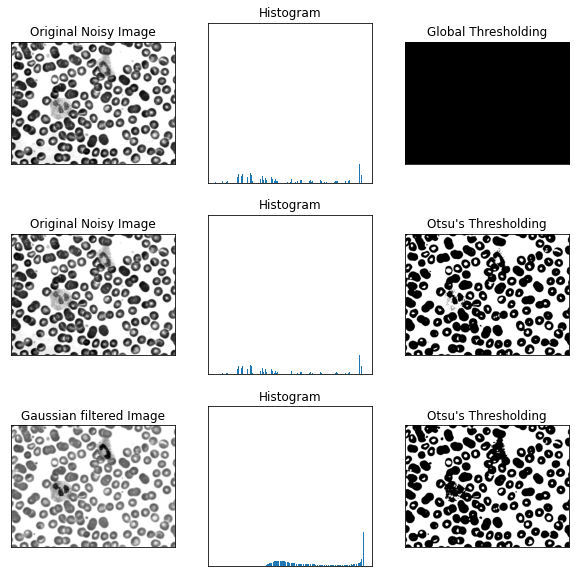

In [33]:
imag = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')

blood = imag[:,:,0]

# global thresholding
ret1,th1 = cv2.threshold(blood,0,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(blood,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
img_b = cv2.cvtColor(imag, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(img_b,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [bc, 0, th1,
          bc, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

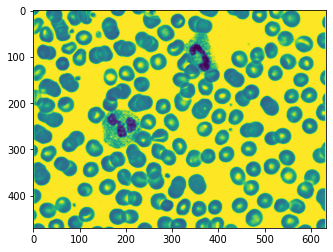

In [34]:
img = cv2.imread('../raw_data/watershed/SimpleExample/bloodsmear.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray);

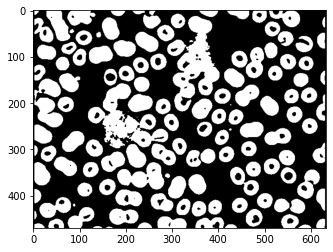

In [35]:
blur = cv2.GaussianBlur(gray,(5,5),0)
ret, thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray');

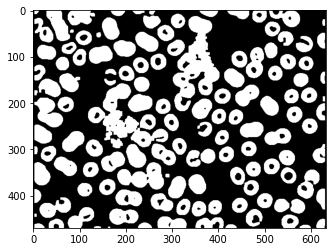

In [36]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.imshow(opening, cmap='gray');

In [37]:
#opening = clear_border(opening)
#plt.imshow(opening, cmap='gray');

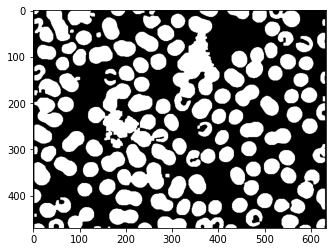

In [38]:
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cv2.drawContours(opening,[cnt],0,255,-1)


plt.imshow(opening, cmap='gray');

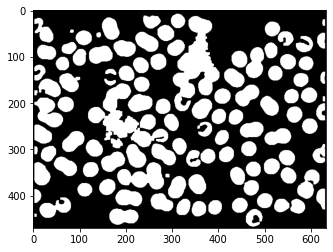

In [50]:
opening = clear_border(opening)
plt.imshow(opening, cmap='gray');

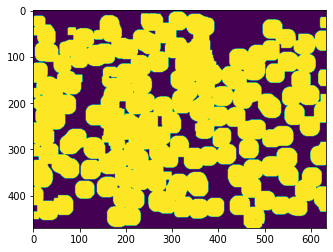

In [53]:
sure_bg = cv2.dilate(opening,kernel,iterations=5)
plt.imshow(sure_bg);

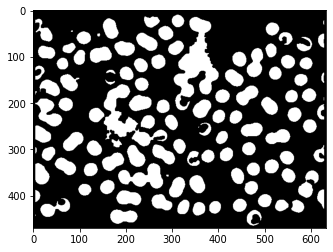

In [62]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)
plt.imshow(sure_fg, cmap='gray');

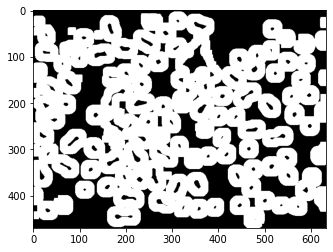

In [55]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, cmap='gray');

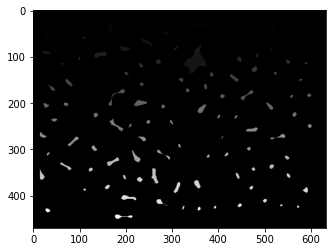

In [56]:
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray');

In [57]:
markers = markers+1

[ -1   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110]
110
(470, 633)


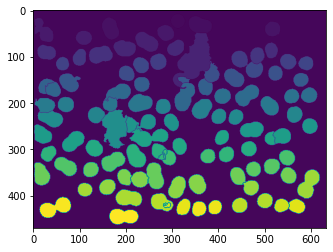

In [58]:
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
print(np.unique(markers))
print(np.amax(markers))
print(markers.shape)
plt.imshow(markers);

In [59]:
#markers[unknown==255] = 0
#markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

#plt.imshow(markers);

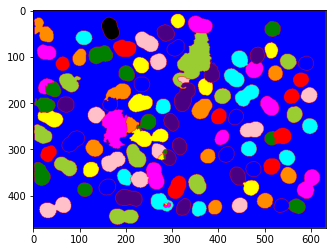

In [60]:
img2 = color.label2rgb(markers, bg_label=4)
plt.imshow(img2);

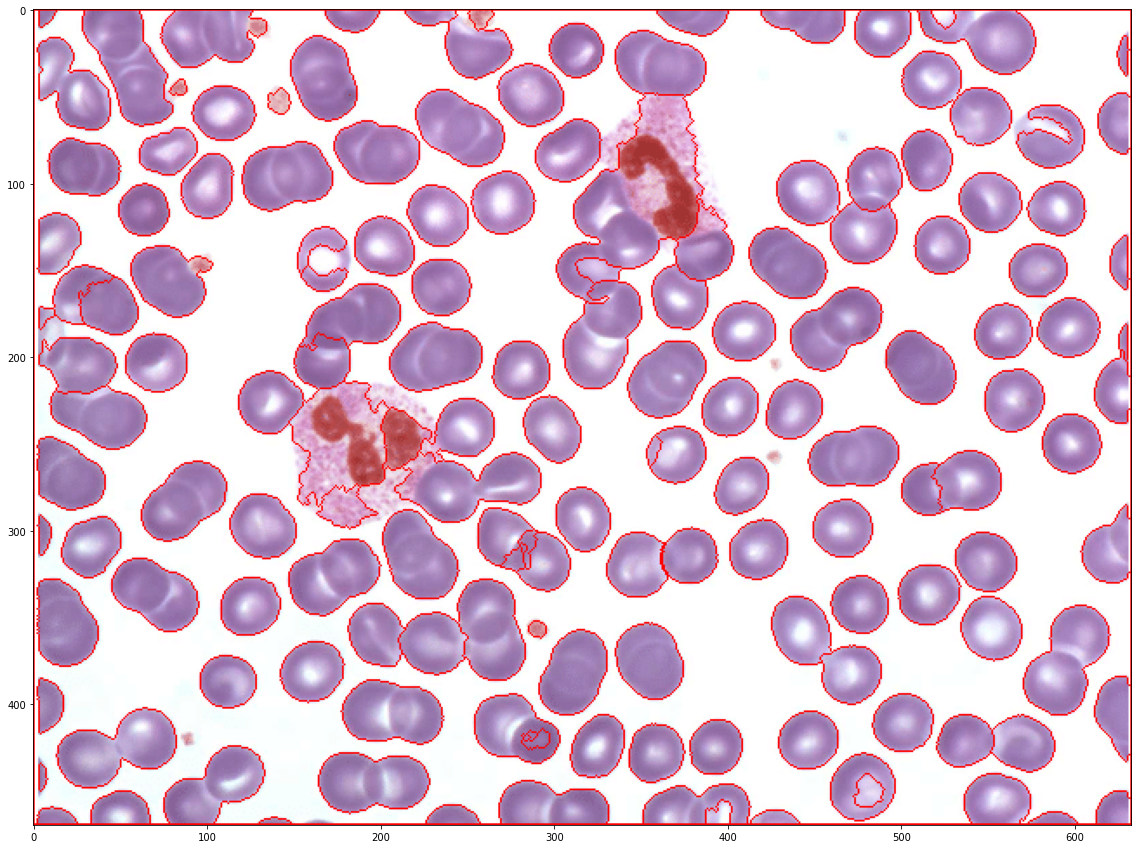

In [61]:
plt.figure(figsize=(20,15))
plt.imshow(img);

Label: 1 Area: 146986


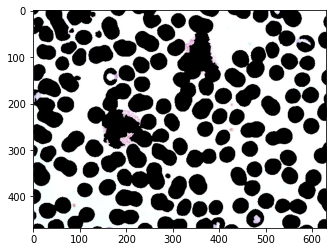

Label: 2 Area: 55


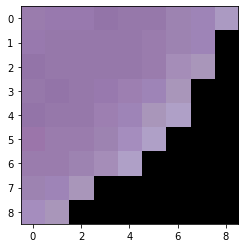

Label: 3 Area: 1940


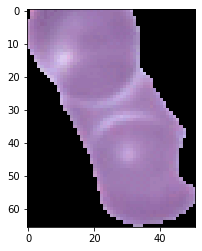

Label: 4 Area: 1462


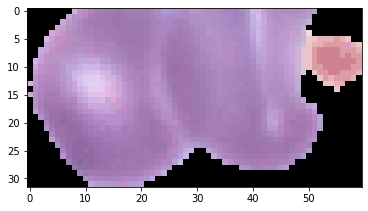

Label: 5 Area: 270


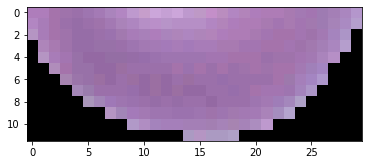

Label: 6 Area: 175


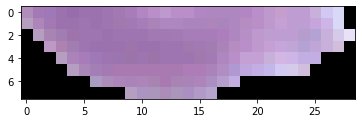

Label: 7 Area: 96


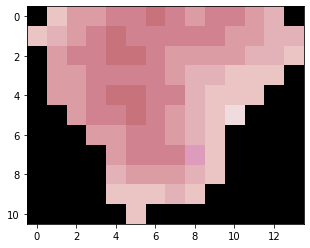

Label: 8 Area: 398


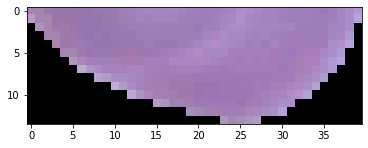

Label: 9 Area: 611


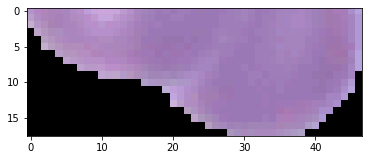

Label: 10 Area: 698


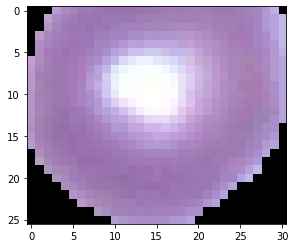

Label: 11 Area: 1472


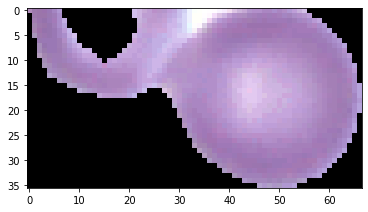

Label: 12 Area: 700


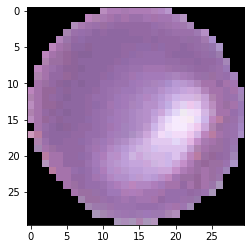

Label: 13 Area: 940


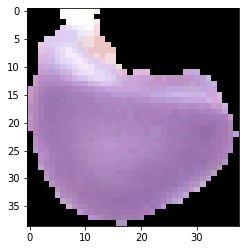

Label: 14 Area: 10276


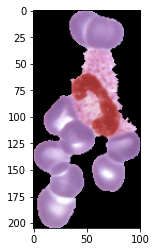

Label: 15 Area: 1289


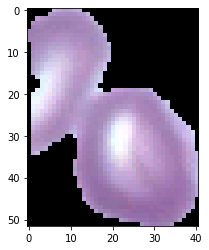

Label: 16 Area: 1317


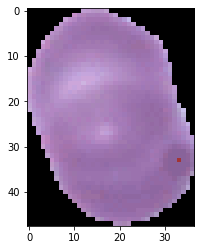

Label: 17 Area: 76


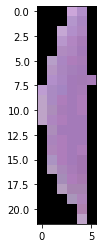

Label: 18 Area: 840


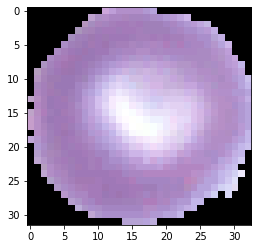

Label: 19 Area: 973


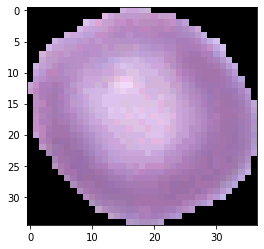

Label: 20 Area: 50


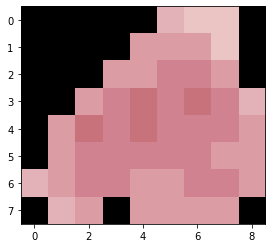

Label: 21 Area: 833


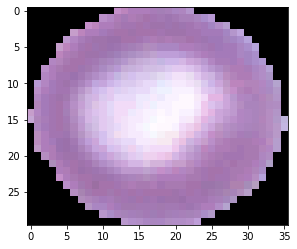

Label: 22 Area: 1488


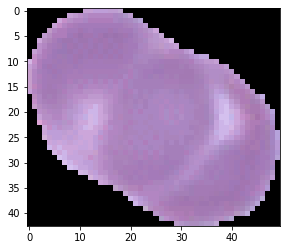

Label: 23 Area: 852


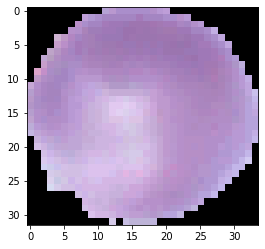

Label: 24 Area: 120


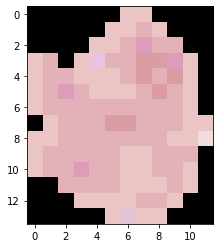

Label: 25 Area: 498


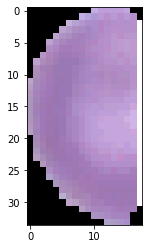

Label: 26 Area: 789


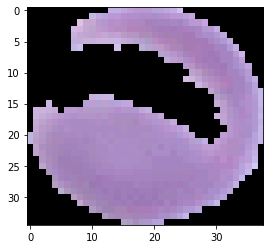

Label: 27 Area: 1322


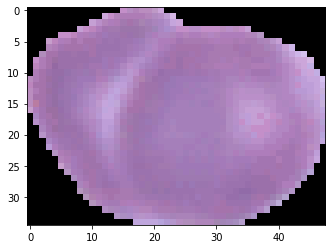

Label: 28 Area: 951


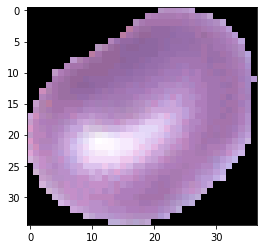

Label: 29 Area: 620


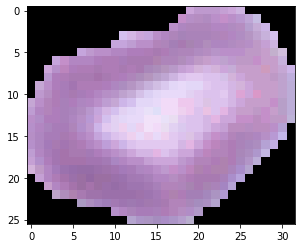

Label: 30 Area: 732


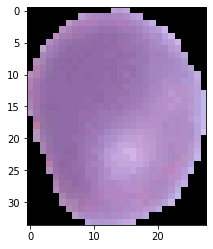

Label: 31 Area: 1015


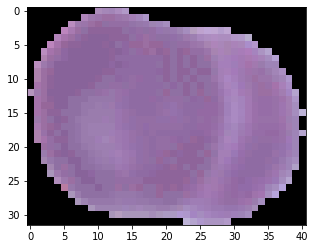

Label: 32 Area: 1498


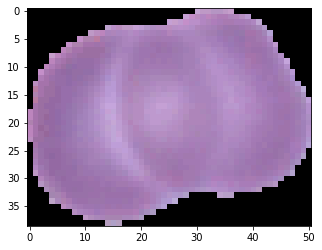

Label: 33 Area: 1835


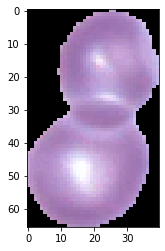

Label: 34 Area: 816


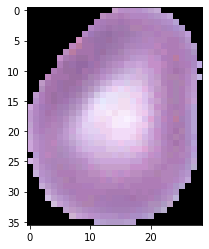

Label: 35 Area: 1007


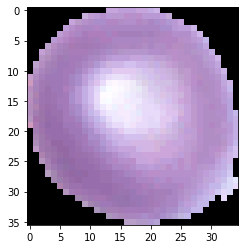

Label: 36 Area: 960


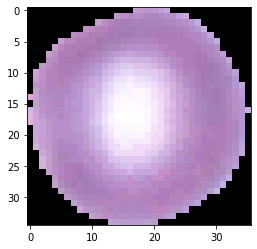

Label: 37 Area: 901


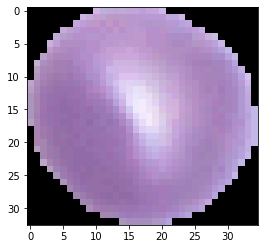

Label: 38 Area: 631


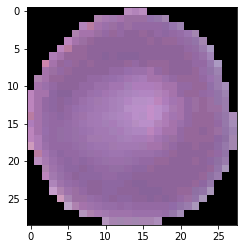

Label: 39 Area: 741


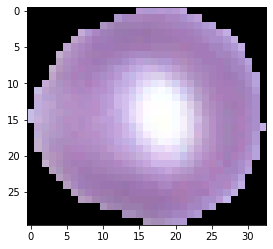

Label: 40 Area: 895


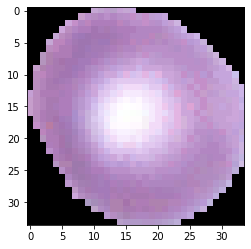

Label: 41 Area: 634


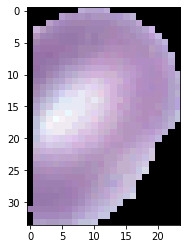

Label: 42 Area: 869


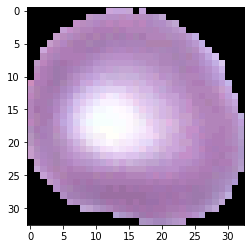

Label: 43 Area: 784


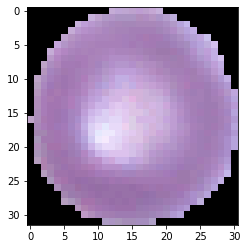

Label: 44 Area: 283


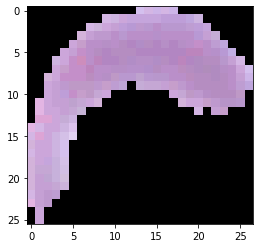

Label: 45 Area: 1254


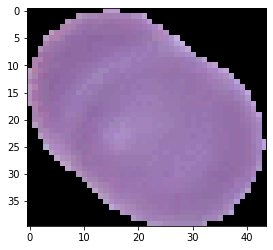

Label: 46 Area: 207


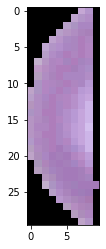

Label: 47 Area: 1280


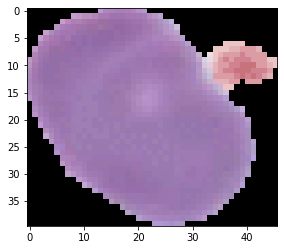

Label: 48 Area: 749


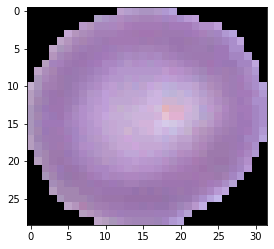

Label: 49 Area: 835


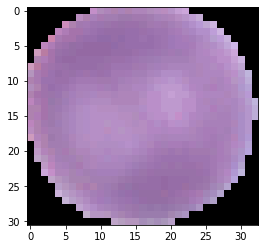

Label: 50 Area: 1363


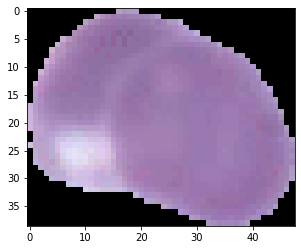

Label: 51 Area: 206


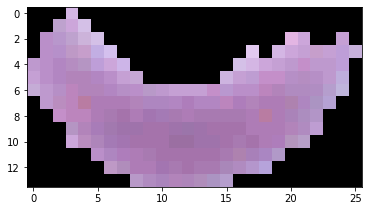

Label: 52 Area: 7422


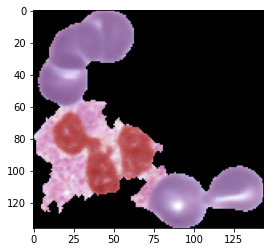

Label: 53 Area: 1541


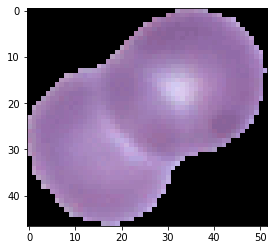

Label: 54 Area: 884


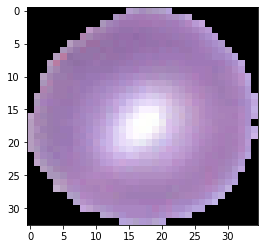

Label: 55 Area: 911


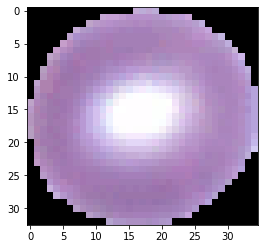

Label: 56 Area: 771


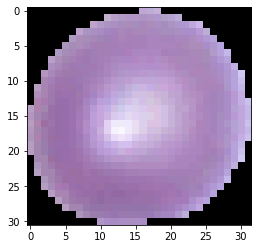

Label: 57 Area: 55


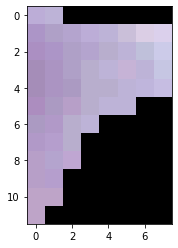

Label: 58 Area: 1518


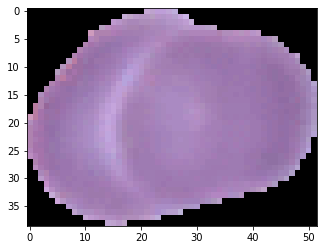

Label: 59 Area: 1179


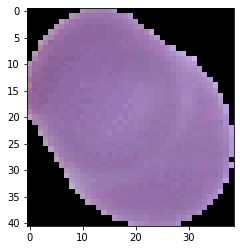

Label: 60 Area: 894


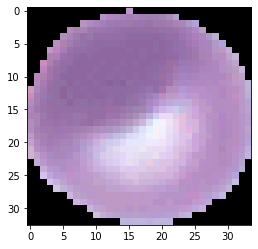

Label: 61 Area: 54


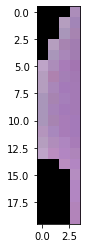

Label: 62 Area: 2377


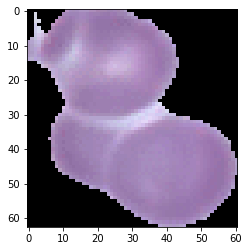

Label: 63 Area: 819


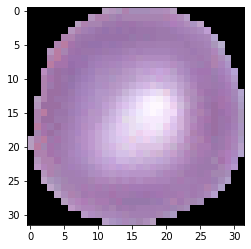

Label: 64 Area: 1380


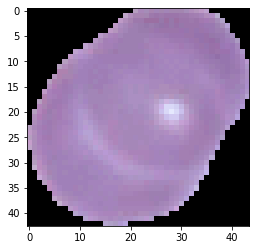

Label: 65 Area: 571


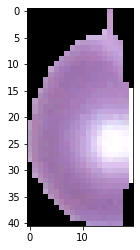

Label: 66 Area: 948


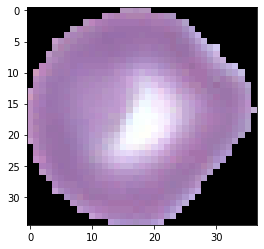

Label: 67 Area: 918


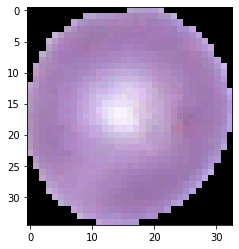

Label: 68 Area: 809


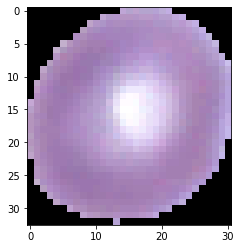

Label: 69 Area: 798


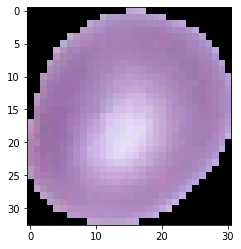

Label: 70 Area: 930


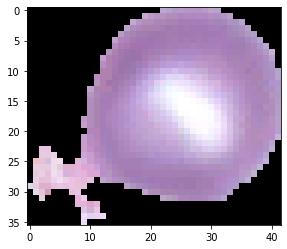

Label: 71 Area: 882


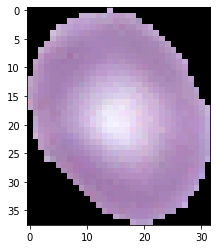

Label: 72 Area: 853


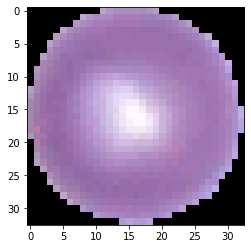

Label: 73 Area: 729


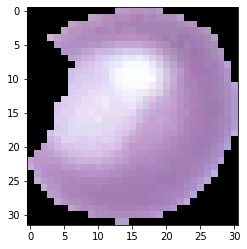

Label: 74 Area: 1357


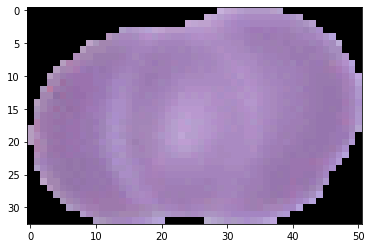

Label: 75 Area: 1145


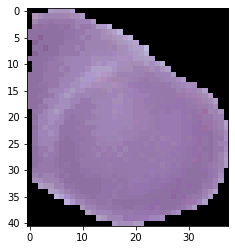

Label: 76 Area: 73


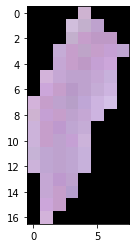

Label: 77 Area: 1505


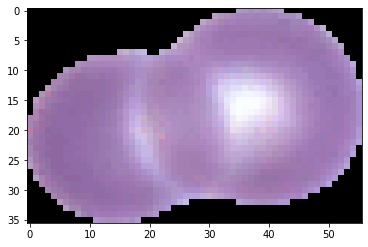

Label: 78 Area: 730


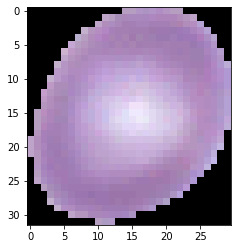

Label: 79 Area: 1439


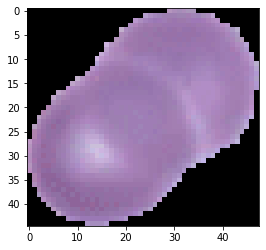

Label: 80 Area: 453


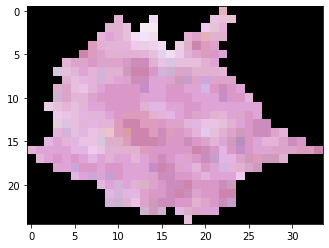

Label: 81 Area: 848


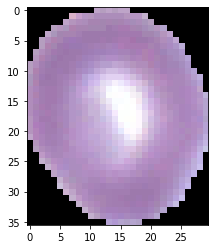

Label: 82 Area: 1024


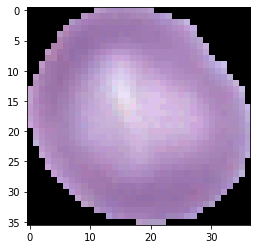

Label: 83 Area: 841


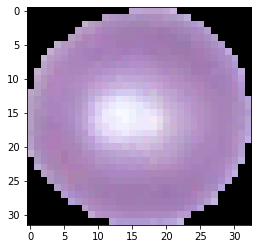

Label: 84 Area: 1501


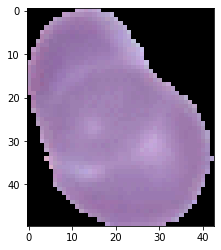

Label: 85 Area: 1536


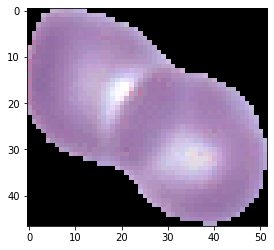

Label: 86 Area: 818


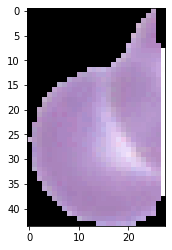

Label: 87 Area: 831


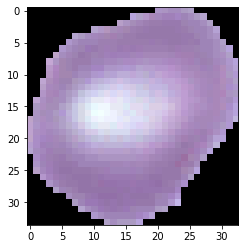

Label: 88 Area: 97


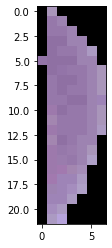

Label: 89 Area: 851


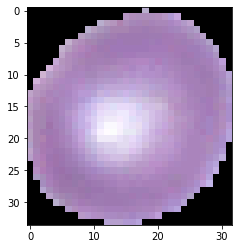

Label: 90 Area: 752


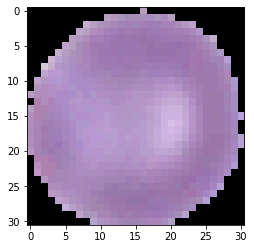

Label: 91 Area: 966


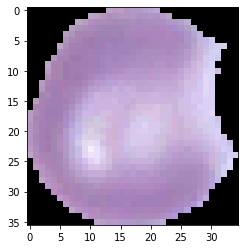

Label: 92 Area: 885


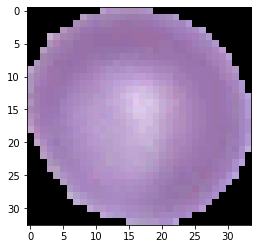

Label: 93 Area: 1523


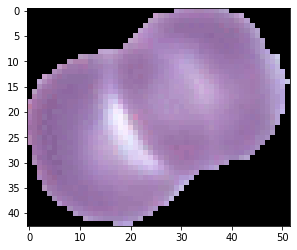

Label: 94 Area: 1367


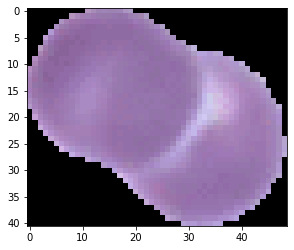

Label: 95 Area: 917


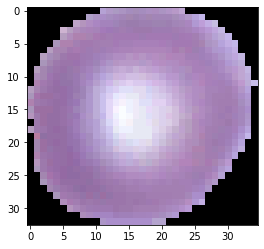

Label: 96 Area: 804


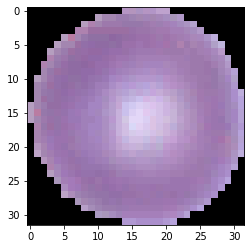

Label: 97 Area: 1289


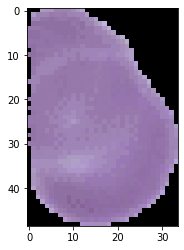

Label: 98 Area: 859


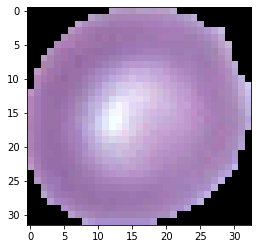

Label: 99 Area: 3518


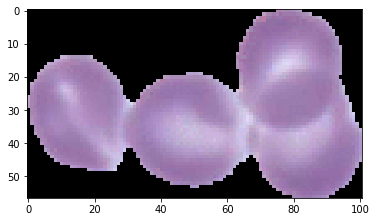

Label: 100 Area: 986


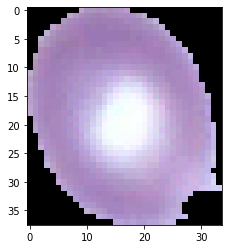

Label: 101 Area: 933


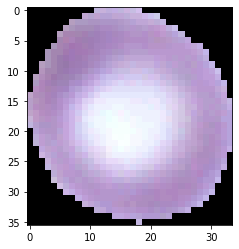

Label: 102 Area: 1831


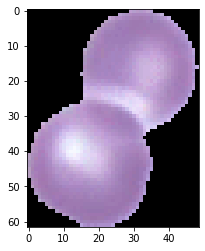

Label: 103 Area: 62


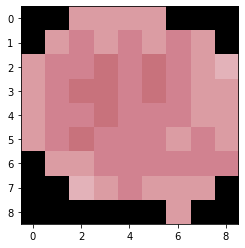

Label: 104 Area: 1241


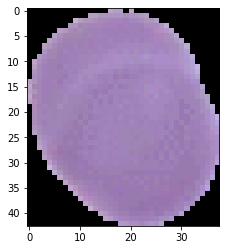

Label: 105 Area: 1341


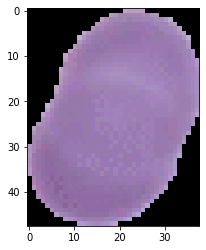

Label: 106 Area: 930


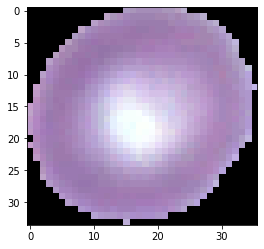

Label: 107 Area: 865


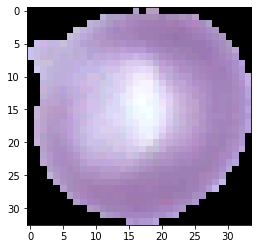

Label: 108 Area: 728


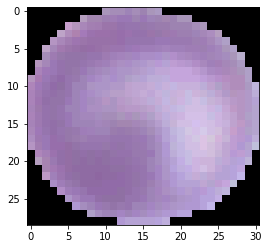

Label: 109 Area: 666


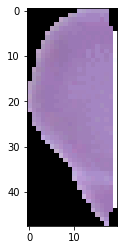

Label: 110 Area: 315


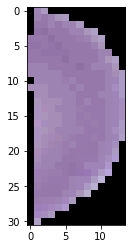

Label: 111 Area: 1599


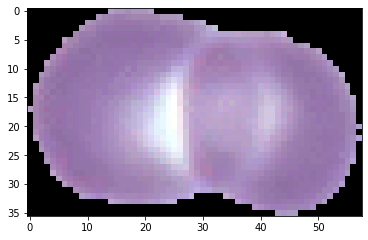

Label: 112 Area: 1326


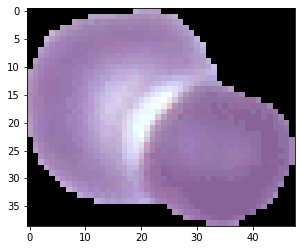

Label: 113 Area: 855


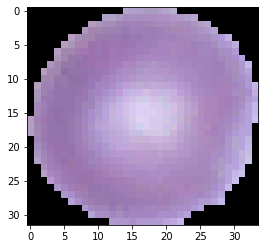

Label: 114 Area: 1829


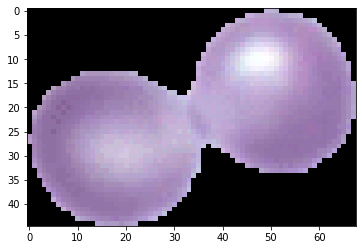

Label: 115 Area: 849


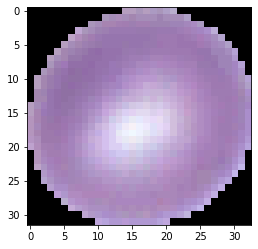

Label: 116 Area: 815


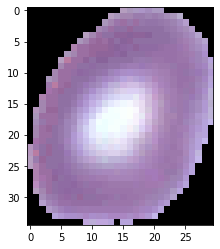

Label: 117 Area: 716


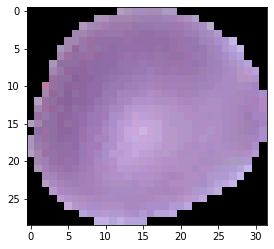

Label: 118 Area: 846


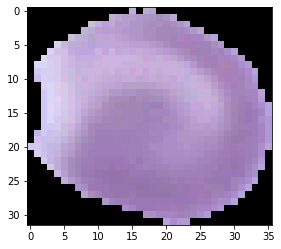

Label: 119 Area: 712


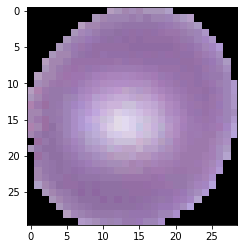

Label: 120 Area: 791


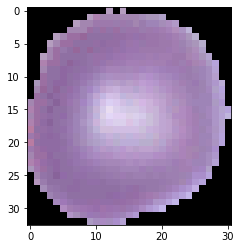

Label: 121 Area: 1487


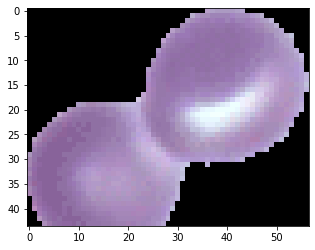

Label: 122 Area: 1668


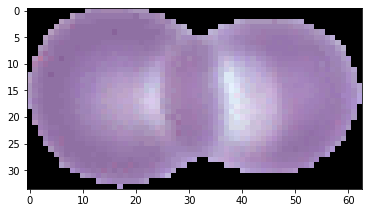

Label: 123 Area: 799


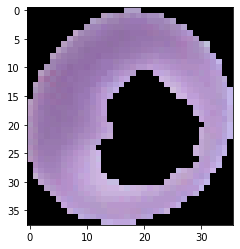

Label: 124 Area: 39


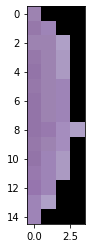

Label: 125 Area: 879


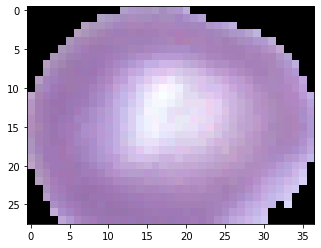

Label: 126 Area: 1206


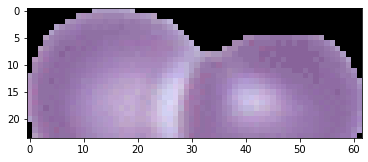

Label: 127 Area: 940


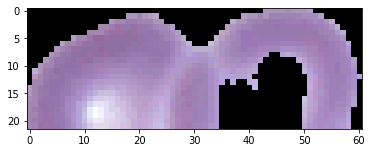

Label: 128 Area: 496


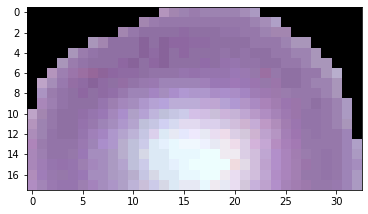

Label: 129 Area: 297


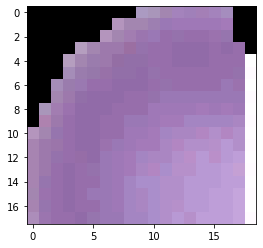

Label: 130 Area: 229


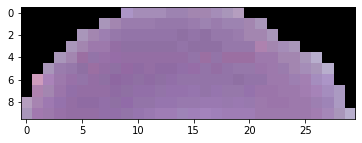

Label: 131 Area: 148


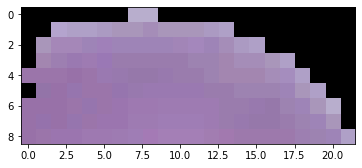

Label: 132 Area: 144


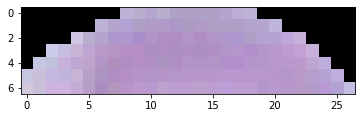

Label: 133 Area: 113


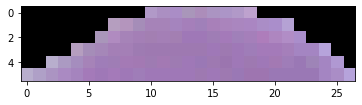

Label: 134 Area: 34


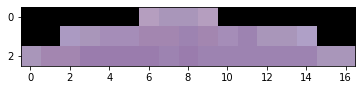

In [49]:
regions = measure.regionprops(markers, intensity_image=img)
regions

for prop in regions:
    
    print('Label: {} Area: {}'.format(prop.label, prop.area))    
    plt.imshow(prop.intensity_image)
    plt.show();